<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

In [15]:
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [1]:
# Name: Saja Fawagreh
# Student Number: 101217326

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [3]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""
from sympy import exp, cos, sin, log

x = 0
y = 1
z = 1

dfx = 2*x*exp(x**2) + y*exp(x*y) + -z*sin(x)
dfy = y**y*(log(y) + 1) + x*exp(x*y)
dfz = cos(x)
print(dfx, dfy, dfz)

1 1 1


In [4]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

"""
Each component of the gradient shows how the function changes when one variable \
increases while the others are held constant. The x-component represents the \
rate of change of the function with respect to x, and its positive value means \
the function increases as x increases near the point (0, 1, 1). The y-component \
shows how the function changes with respect to y, and its positive value \
indicates that increasing y also increases the function. The z-component \
represents the change with respect to z, and since it is positive, the function \
increases as z increases. Overall, the gradient points in the direction where \
the function increases most rapidly, and at this point the function increases \
in all three directions.
"""

'\nEach component of the gradient shows how the function changes when one variable increases while the others are held constant. The x-component represents the rate of change of the function with respect to x, and its positive value means the function increases as x increases near the point (0, 1, 1). The y-component shows how the function changes with respect to y, and its positive value indicates that increasing y also increases the function. The z-component represents the change with respect to z, and since it is positive, the function increases as z increases. Overall, the gradient points in the direction where the function increases most rapidly, and at this point the function increases in all three directions.\n'

In [5]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

f = lambda x, y, z: exp(x**2) + y**y + exp(x*y) + z*cos(x)

h = 1e-5

dfx_num = (f(x + h, y, z) - f(x, y, z)) / h
dfy_num = (f(x, y + h, z) - f(x, y, z)) / h
dfz_num = (f(x, y, z + h) - f(x, y, z)) / h

print("Analytical gradient:", dfx, dfy, dfz)
print("Numerical gradient:", dfx_num, dfy_num, dfz_num)

print("f(0,1,1) =", f(0, 1, 1))

Analytical gradient: 1 1 1
Numerical gradient: 1.00000999996297 1.00001000005179 0.999999999962142
f(0,1,1) = 4


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [6]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# Show valid data
print(penguins.head())
print(penguins.info())

# Separate numerical features and labels
numerical_features = penguins.select_dtypes(include=["float64"])
labels = penguins.select_dtypes(include=["object"])

# Basic statistical analysis
print(numerical_features.describe())

# Find missing values
print(penguins.isnull().sum())

# Save entries with missing sex
missing_sex = penguins[penguins["sex"].isnull()]

# Drop rows with any missing values
penguins_clean = penguins.dropna()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

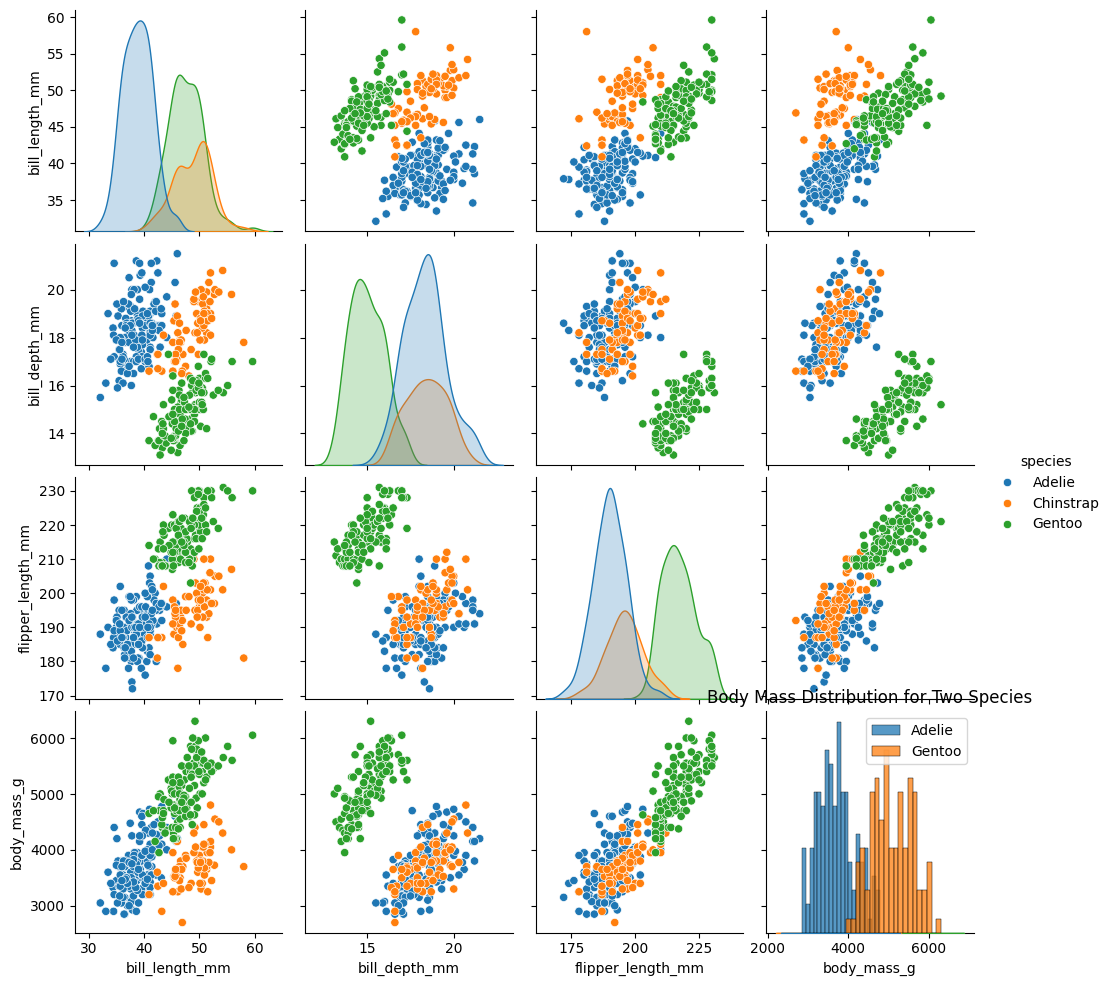

In [7]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

sb.pairplot(
    penguins_clean,
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    hue="species"
)

sb.histplot(
    data=penguins_clean[penguins_clean["species"] == "Adelie"],
    x="body_mass_g",
    bins=20,
    label="Adelie"
)

sb.histplot(
    data=penguins_clean[penguins_clean["species"] == "Gentoo"],
    x="body_mass_g",
    bins=20,
    label="Gentoo"
)

plt.legend()
plt.title("Body Mass Distribution for Two Species")
plt.show()

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


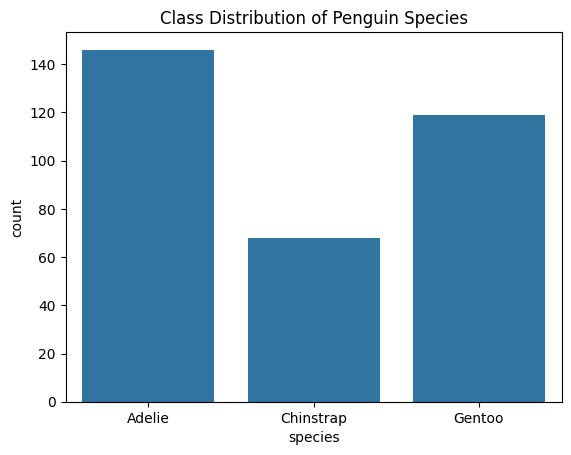

'\nThe class distribution shows a mild imbalance, with Adelie being the most common species and Chinstrap the least represented. While the imbalance is not severe, it could still bias a classification model toward predicting the majority class.\n'

In [8]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

class_proportions = penguins_clean["species"].value_counts(normalize=True)
print(class_proportions)

sb.countplot(data=penguins_clean, x="species")
plt.title("Class Distribution of Penguin Species")
plt.show()

"""
The class distribution shows a mild imbalance, with Adelie being the most common \
species and Chinstrap the least represented. While the imbalance is not severe, \
it could still bias a classification model toward predicting the majority class.
"""


## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [9]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# Features and labels
X = penguins_clean.select_dtypes(include=["float64"])
y = penguins_clean["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# First 5 rows of training data and labels
print(X_train.head())
print(y_train.head())

# Shapes of datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Class distribution in each split
print("\nTraining set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
268            44.9           13.3              213.0       5100.0
205            50.7           19.7              203.0       4050.0
337            48.8           16.2              222.0       6000.0
123            41.4           18.5              202.0       3875.0
38             37.6           19.3              181.0       3300.0
268       Gentoo
205    Chinstrap
337       Gentoo
123       Adelie
38        Adelie
Name: species, dtype: object
X_train shape: (266, 4)
X_test shape: (67, 4)
y_train shape: (266,)
y_test shape: (67,)

Training set class distribution:
species
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Test set class distribution:
species
Adelie       29
Gentoo       24
Chinstrap    14
Name: count, dtype: int64


Training accuracy: 1.0
Test accuracy: 0.9552238805970149
CV mean accuracy: 0.9669340463458111
CV std deviation: 0.024995034792155084


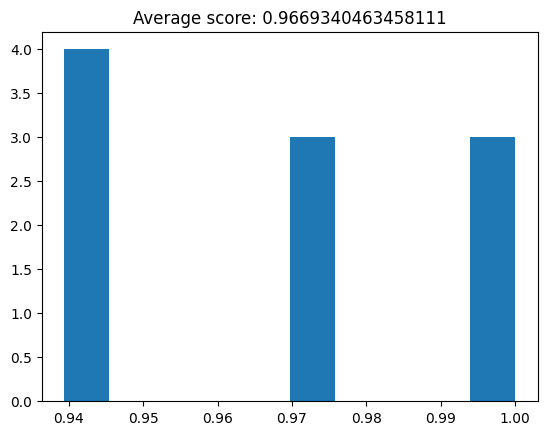

'\nThe histogram shows the distribution of accuracy scores from 10-fold cross-validation.  Most scores are concentrated near high accuracy values, indicating that the decision  tree performs consistently well across different data splits. The small spread  suggests low variability in performance, although the high accuracy may still  indicate potential overfitting, which is common with decision trees.\n'

In [10]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# Create classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train
decision_tree_classifier.fit(X_train, y_train)

# Accuracy scores
train_acc = decision_tree_classifier.score(X_train, y_train)
test_acc = decision_tree_classifier.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

# Cross-validation
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)

print("CV mean accuracy:", cv_scores.mean())
print("CV std deviation:", cv_scores.std())

# Histogram
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

"""
The histogram shows the distribution of accuracy scores from 10-fold cross-validation. \
 Most scores are concentrated near high accuracy values, indicating that the decision \
 tree performs consistently well across different data splits. The small spread \
 suggests low variability in performance, although the high accuracy may still \
 indicate potential overfitting, which is common with decision trees.
"""

Best score: 0.9698005698005698
Best parameters: {'max_depth': 5, 'max_features': 4}


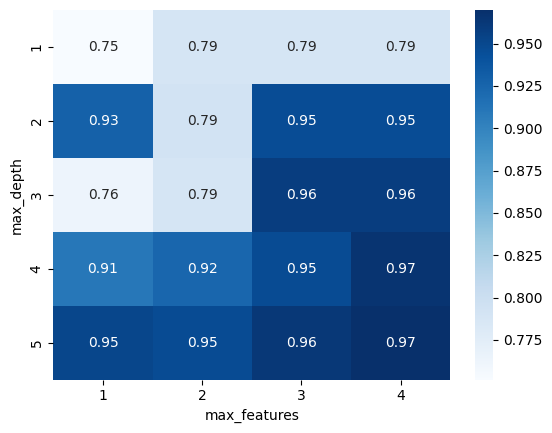

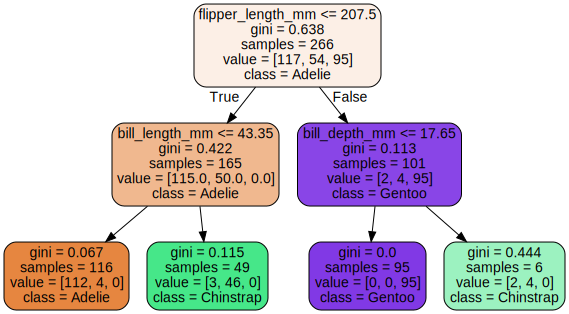

In [11]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.show()

best_tree = DecisionTreeClassifier(
    max_depth=2,
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

best_tree.fit(X_train, y_train)

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=best_tree.classes_,
    filled=True,
    rounded=True
)

graph = Source(dot_data)
display(graph)


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [12]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
penguins_clean = penguins_clean.copy()
penguins_clean["species_encoded"] = le.fit_transform(penguins_clean["species"])

X = penguins_clean[
    ["bill_length_mm", "bill_depth_mm",
     "flipper_length_mm", "body_mass_g",
     "species_encoded"]
]

y = penguins_clean["sex"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", C=0.025)
}

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X_scaled, y, cv=10)

    print(f"\n{name}")
    print("Training accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    print("CV mean accuracy:", cv_scores.mean())



Logistic Regression
Training accuracy: 0.9135338345864662
Test accuracy: 0.9104477611940298
CV mean accuracy: 0.9009803921568629

Decision Tree
Training accuracy: 0.9398496240601504
Test accuracy: 0.835820895522388
CV mean accuracy: 0.870855614973262

KNN
Training accuracy: 0.9511278195488722
Test accuracy: 0.9253731343283582
CV mean accuracy: 0.9011586452762923

SVM
Training accuracy: 0.9022556390977443
Test accuracy: 0.9104477611940298
CV mean accuracy: 0.8947415329768272


In [13]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

missing_sex_copy = missing_sex.copy()

print(missing_sex_copy)

missing_sex_copy.dropna(subset=[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
    "species"
], inplace=True)

missing_sex_copy["species_encoded"] = le.transform(
    missing_sex_copy["species"]
)

X_missing = missing_sex_copy[
    ["bill_length_mm", "bill_depth_mm",
     "flipper_length_mm", "body_mass_g",
     "species_encoded"]
]

X_missing_scaled = scaler.transform(X_missing)

best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)

predicted_sex = best_model.predict(X_missing_scaled)
predicted_probs = best_model.predict_proba(X_missing_scaled)

missing_sex_copy["sex"] = predicted_sex

penguins_filled = penguins_clean.copy()
penguins_filled = pd.concat(
    [penguins_filled, missing_sex_copy],
    ignore_index=True
)

print(penguins_filled["sex"].isnull().sum())

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [16]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Saja Fawagreh, #101217326' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

Author: Saja Fawagreh, #101217326

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 7.34.0

numpy     : 2.0.2
pandas    : 2.2.2
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2
graphviz  : 0.21

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.6.105+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

